In [1]:
!pip install -qU  langchain langchain-google-genai "langchain[docarray]" faiss-cpu pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.5/305.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


In [4]:
!pip install -qU langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00


In [2]:
import os
import requests
from PIL import Image

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown

In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_core.messages import HumanMessage, SystemMessage
from langchain.vectorstores import DocArrayInMemorySearch
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain.schema.document import Document
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.vectorstores import FAISS

In [6]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('my_key')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [28]:
model=ChatGoogleGenerativeAI(model='gemini-2.5-flash',temperature=0.3)

In [10]:
model.invoke("how many iit in india").content

'Currently, there are **23** Indian Institutes of Technology (IITs) in India.'

In [12]:
res=model.invoke("list all iit in india").content

In [13]:
print(res)

As of my last update, there are **23 Indian Institutes of Technology (IITs)** across India. Here is the complete list:

1.  **IIT Bhilai** (Chhattisgarh)
2.  **IIT Bhubaneswar** (Odisha)
3.  **IIT Bombay** (Maharashtra)
4.  **IIT Delhi** (Delhi)
5.  **IIT Dhanbad** (Indian Institute of Technology (Indian School of Mines), Dhanbad - Jharkhand)
6.  **IIT Dharwad** (Karnataka)
7.  **IIT Gandhinagar** (Gujarat)
8.  **IIT Goa** (Goa)
9.  **IIT Guwahati** (Assam)
10. **IIT Hyderabad** (Telangana)
11. **IIT Indore** (Madhya Pradesh)
12. **IIT Jammu** (Jammu & Kashmir)
13. **IIT Jodhpur** (Rajasthan)
14. **IIT Kanpur** (Uttar Pradesh)
15. **IIT Kharagpur** (West Bengal)
16. **IIT Madras** (Tamil Nadu)
17. **IIT Mandi** (Himachal Pradesh)
18. **IIT Palakkad** (Kerala)
19. **IIT Patna** (Bihar)
20. **IIT Roorkee** (Uttarakhand)
21. **IIT Ropar** (Punjab)
22. **IIT Tirupati** (Andhra Pradesh)
23. **IIT (BHU) Varanasi** (Indian Institute of Technology (Banaras Hindu University), Varanasi - Uttar P

In [36]:
def get_image(url,filename,extension):
  content = requests.get(url).content
  with open(f'/content/{filename}.{extension}', 'wb') as f:
    f.write(content)
  image = Image.open(f"/content/{filename}.{extension}")
  image.show()
  filepath=f"/content/{filename}.{extension}"
  return image,filepath

In [37]:
img,filepath=get_image("https://www.joyebike.com/product/beast/images/banner-img-mobile.png","bike_img","png")

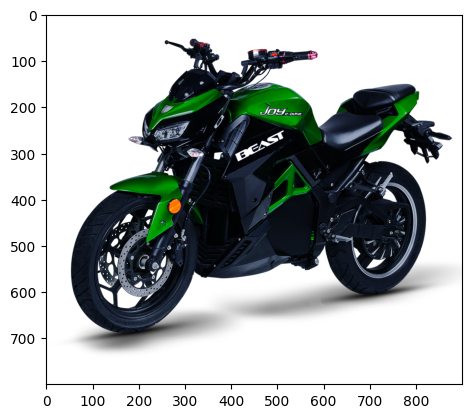

In [38]:
plt.imshow(img)
plt.show()

In [39]:
import base64
with open(filepath, "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode("utf-8")

In [30]:
image = get_image("https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/1705ca64-fbc8-4b79-a451-4ab77760c219/dunk-low-older-shoes-C7T1cx.png",
                  "nike-shoes",
                  "png")

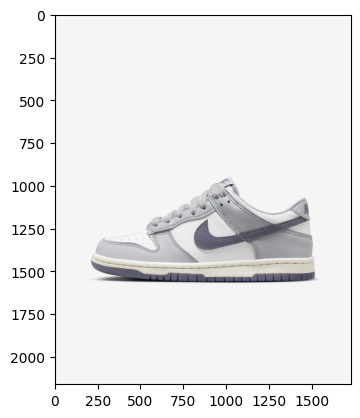

In [31]:
plt.imshow(image)
plt.show()

In [32]:
prompt="give me summary of this image in 10 words"

In [42]:
message= HumanMessage(
    content=[
         {
            "type": "text",
            "text": prompt,
        },
        {

            "type": "image_url",
            "image_url": f"data:image/png;base64,{encoded_image}"
        }
    ]
)

In [43]:
res=model.invoke([message])

In [44]:
res.content

'A vibrant green and black Joy e-bike Beast electric motorcycle.'